# Keras Movie Review Practice Excercise
## by: Guillermo Campollo
### 4/17/2020

In [14]:
from keras.datasets import imdb as imbd
import numpy as np

# Downloading the data, and separating it

In [7]:
#Each word is has its own value and there are only 10,000 available words
(train_data, train_labels),(test_data,test_labels)=imbd.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


# Converting our data to tensors

In [26]:
#This functions helps us to transform each comment into a vector of len 10,000
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results

In [65]:
# We've now transformed each comment into a series of 0s and 1s
# Resulting in a shape of (25,000,10,000) 25k comments with 10k possible words
  
X_trai n= vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

#Now reshaping our labels to float
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


# Approach
### Since we are dealing with 2D tensors that came from input VECTORS and a scalar y we will be using fully connected (Dense) layers with relu activations

In [66]:
#importing keras 
from keras import models
from keras import layers

#Creating model
model = models.Sequential()
#Creating layers:
'''
2 intermediate layers with 16 units each and relu activation
1 output layer with sigmoid activation
'''
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

### Compilation

In [67]:

#We are using binary_crossentropy for loss function, since it is a binary classification
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])


### Training and history

In [68]:
#Setting a validation set for tracking performance inside the network
X_val = X_train[:10000] 
partial_X_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
#Training network
history = model.fit(partial_X_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=[X_val,y_val])



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 299us/step - loss: 0.5399 - acc: 0.7665 - val_loss: 0.4631 - val_acc: 0.7821
Epoch 2/20
15000/15000 [==============================] - 3s 230us/step - loss: 0.3369 - acc: 0.8982 - val_loss: 0.3260 - val_acc: 0.8841
Epoch 3/20
15000/15000 [==============================] - 3s 231us/step - loss: 0.2488 - acc: 0.9243 - val_loss: 0.2871 - val_acc: 0.8916
Epoch 4/20
15000/15000 [==============================] - 3s 232us/step - loss: 0.1946 - acc: 0.9397 - val_loss: 0.2979 - val_acc: 0.8794
Epoch 5/20
15000/15000 [==============================] - 4s 239us/step - loss: 0.1574 - acc: 0.9517 - val_loss: 0.2859 - val_acc: 0.8858
Epoch 6/20
15000/15000 [==============================] - 3s 233us/step - loss: 0.1316 - acc: 0.9616 - val_loss: 0.2944 - val_acc: 0.8830
Epoch 7/20
15000/15000 [==============================] - 3s 231us/step - loss: 0.1103 - acc: 0.9683 - val_loss: 0.2969 - 

### Displaying the history of our model

In [72]:
history_dict= history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

# Visualizing Loss

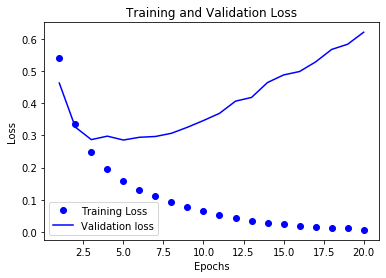

In [77]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,20+1)

plt.plot(epochs, loss_values, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Making predictions

In [88]:
y_pred=list(model.predict(X_test))


In [89]:
#Converting to 1s and 0s
for i in range(len(y_pred)):
    if y_pred[i]>=.5:
        y_pred[i]=1
    else:
        y_pred[i]=0

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.85072

### With this approach we got 85% accuracy on our test set